<a href="https://colab.research.google.com/github/githubdcw/github-KU-Lecture-notes-on-Electromagnetics/blob/main/example_find_length_and_weight_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# จงหาความยาวของเส้นโค้งที่เขียนด้วยสมการ $y = x^2$ เมื่อ $0<x<2$  


กราฟด้านล้างแสดงเส้นโค้ง

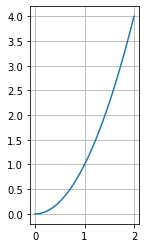

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 40
L = 2
dx = L/N
x = dx*np.array(range(N+1))
y = x**2
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()

เราสามารถประมาณความยาวโดยแบ่งเส้นโค้งเป็น N ส่วน เช่น  
- ถ้าให้ $N=1$ เราจะได้ว่า 
  - ความยาวของชิ้นที่ 1 เท่ากับ $\sqrt{\Delta x_1^2 + \Delta y_1^2} =  \sqrt{2^2 + 4^2} = 4.47$m    
- ถ้าให้ $N=2$ เราจะได้ว่า 
  - ความยาวของชิ้นที่ 2 เท่ากับ $\sqrt{\Delta x_1^2 + \Delta y_1^2}+ \sqrt{\Delta x_2^2 + \Delta y_2^2} =  \sqrt{1^2 + 1^2} + \sqrt{1^2 + 3^2}= 4.57$m  

หรือเราสามารถเขียนเป็นสมการได้ดังนี้ $L \approx \sum_{i=1}^N \sqrt{\Delta x_i^2 + \Delta y_i^2}$  
เราสามารถเขียนโปรแกรมได้ตาม Python Code ด้านล่าง




In [2]:
import numpy as np
N = 4
L = 2
del_x = L/N 
x = del_x*np.array(range(N+1))
y = x**2
dy = y[1:]-y[:N]
print(x)
Length = 0
for ii in range(N):
  Length = Length+(del_x**2+dy[ii]**2)**0.5
print(dy)
print(Length)

[0.  0.5 1.  1.5 2. ]
[0.25 0.75 1.25 1.75]
4.6267234873447


# หาค่าประมาณของความยาวโดยเพิ่มจำนวนการแบ่งส่วงของปัญหาเป็น $N$ ชิ้น โดยให้ $1<N<10$  

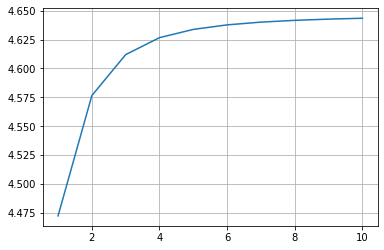

In [3]:
import numpy as np
import matplotlib.pyplot as plt
L = 2
Length = []
for N in range(1,11):
  del_x = L/N 
  x = del_x*np.array(range(N+1))
  y = x**2
  dy = y[1:]-y[:N]
  tmp = 0
  for ii in range(N):
    tmp = tmp+(del_x**2+dy[ii]**2)**0.5
  Length.append(tmp)
plt.plot(range(1,11),Length)
plt.grid()
plt.show()

ถ้าเราให้ N มากขึ้นค่าน้ำหนักที่ได้จะลู่เข้าค่าจริง ถ้าเราต้องการค่าจริงเราต้องแบ่งเป็น $\infty$ ส่วน เราจะได้สมการ $L = \sum_{i=1}^\infty \sqrt{\Delta x_i^2+ \Delta y_i^2}$  
เมื่อ $\Delta x \rightarrow 0$ เราจะได้ว่า $\sum_{i=1}^\infty \rightarrow \int$ และ $\Delta x \rightarrow d x$ ดังนั้น $L = \int_{i=1}^{i= \infty} \sqrt{dx^2 +dy^2}$ และ $i=1$ คือ $x=0$ และ $i=\infty$ คือ $x=2$ ดังนั้นเราจะได้สมการดังนี้     
$$
L = \int_{x=0}^{x= 2} \sqrt{dx^2+ dy^2} 
$$
เนื่องจากความสัมพันธ์ระหว่าง $x$ กับ $y$ คือ $y = x^2$ ดังนั้น เราจะได้ว่า $dy = dx^2 =2x dx$  
$$
L = \int_{x=0}^{x= 2} \sqrt{dx^2+ (2x dx)^2} 
$$
$$
L = \int_{x=0}^{x= 2} \sqrt{1+ 4x^2}dx 
$$
หาค่าโดย [https://www.integral-calculator.com/](https://www.integral-calculator.com/)
$$
L = \int_{x=0}^{x= 2} \sqrt{1+ 4x^2} = 4.65 
$$
จะเห็นว่าถ้าเราประมาณโดยแบ่งเป็น 4 ส่วนเราได้ค่าเท่ากับ 4.63 ซึ่งมีความผิดพลาดเท่ากับ $ \frac{4.65-4.63}{4.65} \times 100 =0.43$%